# Observations and Insights
 

In [1]:
# Dependencies and Setup

import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np


# Study data files

mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results

mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset

merged_data = pd.merge(mouse_metadata, study_results, on="Mouse ID")

# Display the data table for preview

merged_data.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [3]:
# Checking the number of mice.

number_of_mice = len(pd.unique(merged_data["Mouse ID"]))
number_of_mice

249

In [5]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint.

duplicated_mice = merged_data[merged_data.duplicated()]
duplicated_mice

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
909,g989,Propriva,Female,21,26,0,45.0,0


In [6]:
# Optional: Get all the data for the duplicate mouse ID.

merged_data[merged_data["Mouse ID"] == "g989"]

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
908,g989,Propriva,Female,21,26,0,45.000000,0
909,g989,Propriva,Female,21,26,0,45.000000,0
910,g989,Propriva,Female,21,26,5,48.786801,0
911,g989,Propriva,Female,21,26,5,47.570392,0
912,g989,Propriva,Female,21,26,10,51.745156,0
913,g989,Propriva,Female,21,26,10,49.880528,0
914,g989,Propriva,Female,21,26,15,51.325852,1
915,g989,Propriva,Female,21,26,15,53.442020,0
916,g989,Propriva,Female,21,26,20,55.326122,1
917,g989,Propriva,Female,21,26,20,54.657650,1


In [7]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
 
clean_data = merged_data.loc[merged_data["Mouse ID"] != "g989"]
clean_data

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [8]:
# Checking the number of mice in the clean DataFrame.

len(clean_data["Mouse ID"].unique()) 

248

# Summary Statistics


In [10]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary dataframe.

average_drug_regimen = clean_data.groupby(["Drug Regimen"]).mean()["Tumor Volume (mm3)"]

median_drug_regimen = clean_data.groupby(["Drug Regimen"]).median()["Tumor Volume (mm3)"]

variance_drug_regimen = clean_data.groupby(["Drug Regimen"]).var()["Tumor Volume (mm3)"]

std_drug_regimen = clean_data.groupby(["Drug Regimen"]).std()["Tumor Volume (mm3)"]

sem_drug_regimen = clean_data.groupby(["Drug Regimen"]).sem()["Tumor Volume (mm3)"]

summary_statistics = pd.DataFrame({
    
    "Average Tumor Volume" : average_drug_regimen,
    "Median Tumor Volume": median_drug_regimen,
    "Variance in Tumor Volume": variance_drug_regimen,
    "Standard Deviation in Tumor Volume": std_drug_regimen,
    "Standard Error Margin": sem_drug_regimen
    
})

summary_statistics

,Average Tumor Volume,Median Tumor Volume,Variance in Tumor Volume,Standard Deviation in Tumor Volume,Standard Error Margin
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [11]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Using the aggregation method, produce the same summary statistics in a single line

aggregation_summary = clean_data.groupby(["Drug Regimen"]).agg(['mean','median','var','std','sem'])["Tumor Volume (mm3)"]
aggregation_summary

C:\Users\arman\AppData\Local\Temp\ipykernel_97140\307654032.py:5: FutureWarning: ['Mouse ID', 'Sex'] did not aggregate successfully. If any error is raised this will raise in a future version of pandas. Drop these columns/ops to avoid this warning.
  aggregation_summary = clean_data.groupby(["Drug Regimen"]).agg(['mean','median','var','std','sem'])["Tumor Volume (mm3)"]


,mean,median,var,std,sem
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


# Bar and Pie Charts


<AxesSubplot:xlabel='Drug Regimen'>

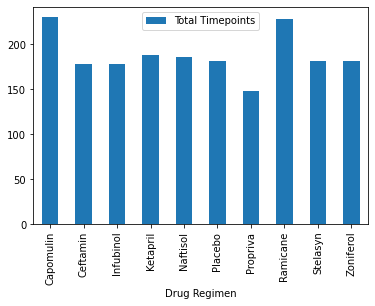

In [14]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using Pandas.

total_timepoints = clean_data.groupby(["Drug Regimen"]).count()["Timepoint"]
timepoints_df = pd.DataFrame({
     "Total Timepoints" : total_timepoints
 })

timepoints_df.plot.bar(y="Total Timepoints")

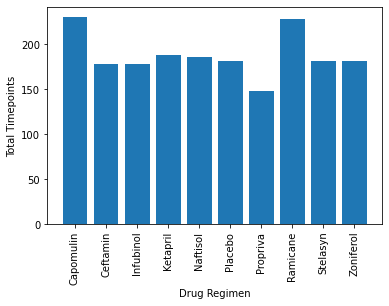

In [16]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using pyplot.

x_values = np.arange(0, 10, 1)

plt.bar(x_values, timepoints_df["Total Timepoints"])
plt.xlabel("Drug Regimen")
plt.ylabel("Total Timepoints")
plt.xticks(x_values,summary_statistics.index, rotation="vertical")
plt.show()

<AxesSubplot:title={'center':'Male VS Female Distribution'}, ylabel='Total'>

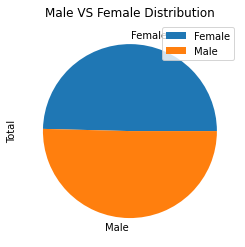

In [18]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas

sex_distribution = clean_data.drop_duplicates(subset = "Mouse ID").groupby("Sex").count()

sex_distribution = sex_distribution["Mouse ID"].to_frame().rename(columns ={ "Mouse ID" : "Total"})

sex_distribution.plot(kind = "pie", y = "Total", title = "Male VS Female Distribution")


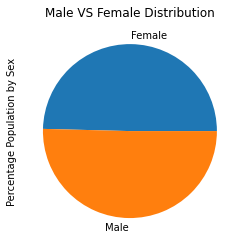

In [24]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
males = sex_distribution.loc["Male", "Total"]

females = sex_distribution.loc["Female", "Total"]

labels = ["Female", "Male"]
sizes = [females, males]
plt.pie(sizes, labels= labels)
plt.title("Male VS Female Distribution")
plt.ylabel("Percentage Population by Sex")
plt.show()

# Quartiles, Outliers and Boxplots


In [ ]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse


# Merge this group df with the original dataframe to get the tumor volume at the last timepoint
 

In [ ]:
# Put treatments into a list for for loop (and later for plot labels)


# Create empty list to fill with tumor vol data (for plotting)


# Calculate the IQR and quantitatively determine if there are any potential outliers. 

    
    # Locate the rows which contain mice on each drug and get the tumor volumes
    
    
    # add subset 
    
    
    # Determine outliers using upper and lower bounds

In [ ]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest

# Line and Scatter Plots


In [ ]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin
 

In [ ]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen
 

# Correlation and Regression


In [ ]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen